# Q2, Simone's Part

In [ ]:
import networkx as nx
import pandas as pd

hero_net = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/hero-network.csv')
hero_net

In [12]:
# First, we need to define the top N heroes:
hero_comic = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')
hero_comic

hero     comic
0      24-HOUR MAN/EMMANUEL    AA2 35
1      3-D MAN/CHARLES CHAN     AVF 4
2      3-D MAN/CHARLES CHAN     AVF 5
3      3-D MAN/CHARLES CHAN     COC 1
4      3-D MAN/CHARLES CHAN    H2 251
...                     ...       ...
96099                 ZZZAX    H2 326
96100                 ZZZAX    H2 327
96101                 ZZZAX  M/CP 8/4
96102                 ZZZAX     PM 47
96103                 ZZZAX   WCA2 12

[96104 rows x 2 columns]

In [13]:
top_heroes = pd.DataFrame(hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)
top_heroes

Total_Appearances
hero                                      
SPIDER-MAN/PETER PARKER               1577
CAPTAIN AMERICA                       1334
IRON MAN/TONY STARK                   1150
THING/BENJAMIN J. GR                   963
THOR/DR. DONALD BLAK                   956
...                                    ...
LEASH, MICAH                             1
LEATHER/                                 1
SERSI | MUTANT X-VER                     1
LEE, LITTLE LARRY                        1
24-HOUR MAN/EMMANUEL                     1

[6439 rows x 1 columns]

In [14]:
# We create the function top_N:
def top_N(data, N):
    return data[0:N-1]

top_N(top_heroes, 50)

Total_Appearances
hero                                      
SPIDER-MAN/PETER PARKER               1577
CAPTAIN AMERICA                       1334
IRON MAN/TONY STARK                   1150
THING/BENJAMIN J. GR                   963
THOR/DR. DONALD BLAK                   956
HUMAN TORCH/JOHNNY S                   886
MR. FANTASTIC/REED R                   854
HULK/DR. ROBERT BRUC                   835
WOLVERINE/LOGAN                        819
INVISIBLE WOMAN/SUE                    762
SCARLET WITCH/WANDA                    643
BEAST/HENRY &HANK& P                   635
DR. STRANGE/STEPHEN                    631
WATSON-PARKER, MARY                    622
DAREDEVIL/MATT MURDO                   619
HAWK                                   605
VISION                                 603
CYCLOPS/SCOTT SUMMER                   585
WASP/JANET VAN DYNE                    581
JAMESON, J. JONAH                      577
ANT-MAN/DR. HENRY J.                   561
SUB-MARINER/NAMOR MA                   530
STORM/ORORO MUNROE S                   523
PROFESSOR X/CHARLES                    496
FURY, COL. NICHOLAS                    471
MARVEL GIRL/JEAN GRE                   466
COLOSSUS II/PETER RA                   452
NIGHTCRAWLER/KURT WA                   444
ANGEL/WARREN KENNETH                   444
ICEMAN/ROBERT BOBBY                    427
SHE-HULK/JENNIFER WA                   415
JARVIS, EDWIN                          399
WONDER MAN/SIMON WIL                   390
BLACK WIDOW/NATASHA                    384
ROBERTSON, JOE                         380
PARKER, MAY                            377
HERCULES [GREEK GOD]                   353
QUICKSILVER/PIETRO M                   342
SHADOWCAT/KATHERINE                    329
JONES, RICHARD MILHO                   322
ODIN [ASGARDIAN]                       321
ROGUE /                                320
BLACK PANTHER/T'CHAL                   318
SILVER SURFER/NORRIN                   310
CANNONBALL II/SAM GU                   307
PUNISHER II/FRANK CA                   299
CAPTAIN BRITAIN/BRIA                   279
NELSON, FRANKLIN FOG                   278
DR. DOOM/VICTOR VON                    270

In [10]:
# Now we have to create the graphs.

# The first graph is the one Ioannis created in class, so:
from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv')
# The second one is the graph that links heroes to comics:
g, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')

In [ ]:
import matplotlib.pyplot as plt

g.edges()

In [28]:
nx.bidirectional_shortest_path(g, 'ZABU', 'ABOMINATION/EMIL BLO')

['ZABU', 'A 118', "BLACK PANTHER/T'CHAL", 'H2 278', 'ABOMINATION/EMIL BLO']

In [22]:
hero1 = 'Superman'
hero2 = 'Batman'

list_heroes = ['Spongebob', 'Pikachu', 'Joker']

list_heroes.insert(0, hero1)
list_heroes.append(hero2)
list_heroes

['Superman', 'Spongebob', 'Pikachu', 'Joker', 'Batman']

## Functionality 3:

In [54]:
nx.info(g)

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12395/3034883828.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(g)


'Graph with 19087 nodes and 96104 edges'

In [ ]:
import itertools
import networkx as nx

def get_subgraph_with(graph: nx.Graph, heroes: iter):
    """Gets a subgraph of the given graph with the heroes and their neighbours.
    :arg
    graph (nx.Graph) - a networkx graph consisting of heroes that are connected to comics.
    heroes (iter) - an iterable of heroes that should be included in the subgraph.
    :return
    a networkx graph that is a subgraph of the given graph with all the provided heroes and the comics they appear in.
    """
    comics = list(itertools.chain(*set(graph.neighbors(hero) for hero in heroes)))
    subgraph = graph.subgraph(heroes + comics)
    return subgraph

subg = get_subgraph_with(g_hero_net,  list(top_N(top_heroes, 2).index))
print(len(subg.nodes()))

In [29]:
# Now we can implement Functionality 3:
def shortest_order_route(data, initial_hero, final_hero, superheroes: list, N = 25):  # 
     
     # First of all, we initialize the list which will contain the shortes path
     path = []

     # Second, we have to focus on the top N nodes in the graph.
     # To do it, we first remove the nodes (and the edges, of course) that are not in the top-N nodes
     subg = get_subgraph_with(g_hero_net,  list(top_N(top_heroes, N).index))

     # Now we want to create a list containing all the superheroes we have to visit, inlcluding the starting one and the ending one
     superheroes.insert(0, initial_hero)
     superheroes.append(final_hero)


     # Now, we compute the shortest path between the first and the second, then between the second and the third, and so on,
     # until we visit (in order) all the nodes contained in the original list given as input
     for h in range(len(superheroes) - 1):
          a = nx.bidirectional_shortest_path(data, superheroes[h], superheroes[h+1])
          if len(a) == 0:
               print("WARNING: There is no such path")
               break
          for x in a:
               path.append(a)
     return(superheroes)

     

['Mone', 'Raul, Davide', 'Daniele', 'Susi']

In [30]:
ini = 'CYCLOPS/SCOTT SUMMER'
fin = 'COLOSSUS II/PETER RA'
h = ['WASP/JANET VAN DYNE', 'JAMESON, J. JONAH', 'SUB-MARINER/NAMOR MA', 'PROFESSOR X/CHARLES', 'FURY, COL. NICHOLAS', 'MARVEL GIRL/JEAN GRE']

shortest_order_route(g_hero_net, ini, fin, h)

['CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'SUB-MARINER/NAMOR MA',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA']

In [17]:
list(top_N(top_heroes, 50).index)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE',
 'SCARLET WITCH/WANDA',
 'BEAST/HENRY &HANK& P',
 'DR. STRANGE/STEPHEN',
 'WATSON-PARKER, MARY',
 'DAREDEVIL/MATT MURDO',
 'HAWK',
 'VISION',
 'CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'ANT-MAN/DR. HENRY J.',
 'SUB-MARINER/NAMOR MA',
 'STORM/ORORO MUNROE S',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA',
 'NIGHTCRAWLER/KURT WA',
 'ANGEL/WARREN KENNETH',
 'ICEMAN/ROBERT BOBBY',
 'SHE-HULK/JENNIFER WA',
 'JARVIS, EDWIN',
 'WONDER MAN/SIMON WIL',
 'BLACK WIDOW/NATASHA',
 'ROBERTSON, JOE',
 'PARKER, MAY',
 'HERCULES [GREEK GOD]',
 'QUICKSILVER/PIETRO M',
 'SHADOWCAT/KATHERINE',
 'JONES, RICHARD MILHO',
 'ODIN [ASGARDIAN]',
 'ROGUE /',
 "BLACK PANTHER/T'CHAL",
 'SILVER SURFER

In [133]:
shortest_order_route(g)  # 'HAWK', 'DR. DOOM/VICTOR VON', ['DAREDEVIL/MATT MURDO', 'CAPTAIN BRITAIN/BRIA', 'WOLVERINE/LOGAN', 'JAMESON, J. JONAH'],

/var/folders/hx/2gpt5h2s34qggb7m0q503qy00000gn/T/ipykernel_12395/3878726980.py:27: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  return(nx.info(data))


'Graph with 48 nodes and 0 edges'

In [ ]:
g.nodes()

In [125]:
list(top_N(top_heroes, 500).index)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE',
 'SCARLET WITCH/WANDA',
 'BEAST/HENRY &HANK& P',
 'DR. STRANGE/STEPHEN',
 'WATSON-PARKER, MARY',
 'DAREDEVIL/MATT MURDO',
 'HAWK',
 'VISION',
 'CYCLOPS/SCOTT SUMMER',
 'WASP/JANET VAN DYNE',
 'JAMESON, J. JONAH',
 'ANT-MAN/DR. HENRY J.',
 'SUB-MARINER/NAMOR MA',
 'STORM/ORORO MUNROE S',
 'PROFESSOR X/CHARLES',
 'FURY, COL. NICHOLAS',
 'MARVEL GIRL/JEAN GRE',
 'COLOSSUS II/PETER RA',
 'NIGHTCRAWLER/KURT WA',
 'ANGEL/WARREN KENNETH',
 'ICEMAN/ROBERT BOBBY',
 'SHE-HULK/JENNIFER WA',
 'JARVIS, EDWIN',
 'WONDER MAN/SIMON WIL',
 'BLACK WIDOW/NATASHA',
 'ROBERTSON, JOE',
 'PARKER, MAY',
 'HERCULES [GREEK GOD]',
 'QUICKSILVER/PIETRO M',
 'SHADOWCAT/KATHERINE',
 'JONES, RICHARD MILHO',
 'ODIN [ASGARDIAN]',
 'ROGUE /',
 "BLACK PANTHER/T'CHAL",
 'SILVER SURFER

In [95]:
G = nx.path_graph(5)  # or DiGraph, MultiGraph, MultiDiGraph, etc
e = [0, 1, 2]
e

[0, 1, 2]

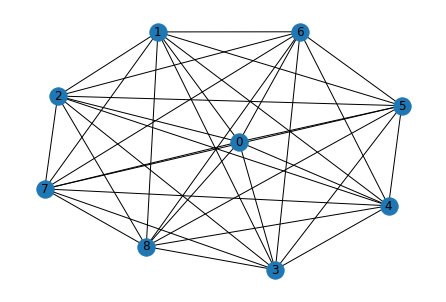

In [115]:
G = nx.complete_graph(9)
nx.draw(G, with_labels = True)

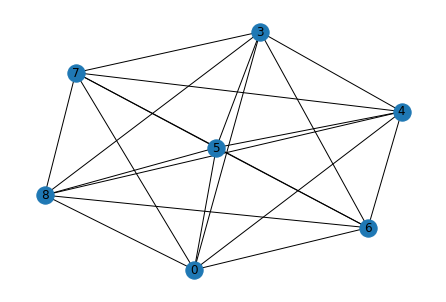

In [116]:
G.remove_nodes_from([1, 2])
nx.draw(G, with_labels = True)

In [117]:
G.edges()

EdgeView([(0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)])

In [121]:
from backend.service import TopHeroService
import pandas as pd

edges = pd.read_csv('/Users/simonefacchiano/Desktop/Data Science/ADM/ADM HW5/archive-2/edges.csv')
hero_service = TopHeroService.create_from(data=edges, preprocess=True)

hero_service.top_n(10)

['SPIDER-MAN/PETER PARKER',
 'CAPTAIN AMERICA',
 'IRON MAN/TONY STARK',
 'THING/BENJAMIN J. GR',
 'THOR/DR. DONALD BLAK',
 'HUMAN TORCH/JOHNNY S',
 'MR. FANTASTIC/REED R',
 'HULK/DR. ROBERT BRUC',
 'WOLVERINE/LOGAN',
 'INVISIBLE WOMAN/SUE']

# Second trial

In [ ]:
# To do this point, we have to face a problem: we only have conncetions between heroes and comics. We also nee connections between comics!
# How to do that?

# To connect two comics in the graph, we will need to find out if there are any heroes that have appeared in both comics. We can do this by looping through the edges in the 'edges.csv' file and checking if a hero has appeared in both comics. If a hero has appeared in both comics, you can add an edge between the two comics in the graph.

In [7]:
# First of all, we import our .csv files:

from backend import graph
import pandas as pd

g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv') # here we connect heroes with other heroes

g_comics, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv') # here we have the connections between heroes and comics.

In [41]:
import numpy as np

nodes = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', names = ['node', 'type'])

comics = np.array(nodes[nodes.type == 'comic'].node)
comics

array(['2001 10', '2001 8', '2001 9', ..., 'YOUNG MEN 26', 'YOUNG MEN 27',
       'YOUNG MEN 28'], dtype=object)

In [51]:
import pandas as pd
from tqdm import tqdm 

# We have to loop through all the comics in the graph.
# We will use the function nx.neighbors you can find here:
## https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html ##

pbar = tqdm(total=len(comics))

for comic in comics:
        heroes = [n for n in g_comics.neighbors(comic) if n not in comics] # Find all the heroes that have appeared in this comic

        # For each hero that have appeared in this comic...
        for hero in heroes:
            try:
                # ... find all the comics that he/she has appeared in:
                #hero_comics = [c for c in g_comics.neighbors(hero) if c in comics]
                hero_comics = set(comics) - set(g_comics.neighbors(hero)) # list of comics that a hero has not appeared in. We are subtracting the set of comics that the hero has appeared in from the set of all comics in the graph.

                # loop through all the comics that this hero has appeared in
                for hero_comic in hero_comics:
                    # if the hero has appeared in both comics, add an edge between the two comics
                    if not g_comics.has_edge(comic, hero_comic):   
                        g_comics.add_edge(comic, hero_comic)
            except nx.NetworkXError:
                continue     

            pbar.update(1)

pbar.close()                   

49198it [1:25:40,  3.72it/s]                          

# Third Trial

In [ ]:
# Connecting all the comics that have a hero in common is too long... we have to find an alternative way.
# A possibility could be the following: since in Functionality 3 we have to set how many 'top heroes' we want to consider, we only add the edges in the subgraph created from the top heroes.
# Let's see how to do that:

In [95]:
# First thing first: import the two datasets
import networkx as nx
import pandas as pd

my_hero_net = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv')
my_hero_comic = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')

In [101]:
pd.DataFrame(my_hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)


Total_Appearances
hero                                      
SPIDER-MAN/PETER PARKER               1577
CAPTAIN AMERICA                       1334
IRON MAN/TONY STARK                   1150
THING/BENJAMIN J. GR                   963
THOR/DR. DONALD BLAK                   956
...                                    ...
LEASH, MICAH                             1
LEATHER/                                 1
SERSI | MUTANT X-VER                     1
LEE, LITTLE LARRY                        1
24-HOUR MAN/EMMANUEL                     1

[6439 rows x 1 columns]

In [105]:
# Here we define a function that takes as input a dataset and returns the top-N heroes

# We sort the heroes based on the appearances:
top_heroes = pd.DataFrame(my_hero_comic.groupby(['hero'])['hero'].count()).rename(columns={'hero':'Total_Appearances'}).sort_values('Total_Appearances', ascending = False)

def top_N(data, N = 100):

    # We return the top N heroes
    return data[0:N]

top_N(top_heroes, 5)

Total_Appearances
hero                                      
SPIDER-MAN/PETER PARKER               1577
CAPTAIN AMERICA                       1334
IRON MAN/TONY STARK                   1150
THING/BENJAMIN J. GR                   963
THOR/DR. DONALD BLAK                   956

In [106]:
# Now we have to create the graphs.

# The first graph is the one Ioannis created in class, so:
from backend import graph
g_hero_net, graph_type = graph.collaborative.create_from(data='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/hero-network.csv')
# The second one is the graph that links heroes to comics:
g, graph_type = graph.hero_comic.create_from(nodes='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', edges='/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/edges.csv')

In [ ]:
# We are going to the following thing: we only keep the heroes in the top N list. In other words, we will remove the nodes that are not in the top list. We can easily do this using the network x functions:

heroes_list = list(top_heroes.index)
heroes_keep = heroes_list[:100]
heroes_remove = heroes_list[100:]

In [110]:
# Now we want to remove these heroes. So we:

# 1. Create a copy of the graph
small_graph = g.copy()

# 2. Remove the nodes corresponding to the heroes in the list
small_graph.remove_nodes_from(heroes_remove)

len(small_graph.nodes())

# NOTE: we are not removing the isolated nodes
# # remove any remaining nodes that have no neighbor
# isolated_nodes = list(nx.isolates(small_graph))
# small_graph.remove_nodes_from(isolated_nodes)

13178

Now the difficult part. We want to connect comics that have a hero in common:

In [ ]:
import numpy as np

nodes = pd.read_csv('/Users/simonefacchiano/Desktop/Data_Science/ADM/ADM_HW5/archive-2/nodes.csv', names = ['node', 'type'])
comics = np.array(nodes[nodes.type == 'comic'].node)

In [123]:
import pandas as pd
from tqdm import tqdm 

# We have to loop through all the comics in the graph.
# We will use the function nx.neighbors you can find here:
## https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html ##

#pbar = tqdm(total=len(comics))

for comic in comics:
        heroes_neighbors = [n for n in small_graph.neighbors(comic) if n not in comics] # Find all the heroes that have appeared in this comic

        # For each hero that have appeared in this comic...
        for hero in heroes_neighbors:
            try:
                # ... find all the comics that he/she has appeared in:
                comics_not_appeared = set(comics) - set(small_graph.neighbors(hero)) # list of comics that a hero has not appeared in. We are subtracting the set of comics that the hero has appeared in from the set of all comics in the graph.
                comics_appeared = set(comics) - set(comics_not_appeared)

                small_graph.add_edges_from(itertools.combinations(comics_appeared, 2))

            except nx.NetworkXError:
                continue     

            #pbar.update(1)

#pbar.close()          

In [120]:
for comic in comics:
    heroes_neighbors = [n for n in small_graph.neighbors(comic) if n not in comics] # Find all the heroes that have appeared in this comic

    # For each hero that have appeared in this comic...
    for hero in heroes_neighbors:
        try:
            # ... find all the comics that he/she has appeared in:
            comics_not_appeared = set(comics) - set(small_graph.neighbors(hero)) # list of comics that a hero has not appeared in. We are subtracting the set of comics that the hero has appeared in from the set of all comics in the graph.
            comics_appeared = set(comics) - set(comics_not_appeared)
            print(comics_appeared)
            print('************************************************')
        except nx.NetworkXError:
            continue      

{'A 267', 'CA:SL2 12', 'A 172', 'CA 451', 'CA 251', 'A 259', 'CB 23', 'ST 123/2', 'A 227', 'CA 358', 'A 161', 'CA COMICS 1', 'CA 145', 'IM 19', 'CA 144', 'INV 30', 'A 27', 'A 200', 'TB 53', 'IM 115', 'ASM 324', 'A 213', 'CB 20', 'CA 164', 'A 302', 'CA 140', 'CA 194', 'PUN2 29', 'CA 295', 'CA 364', 'CA 157', 'CA 153', 'FF 19', 'A3 21', 'SENTRY 1', 'C2 67', 'H2 232', 'A 265', 'NOM 3', 'COC 3', 'IFW 4', 'AVF 10', 'CA 162', 'CA 352', 'AWC 47', 'A3 24', 'CA3 33', 'TOS 81/2', 'CB 17', 'CA3 42', 'CB 27', 'M/FAN 23', 'M/CP 2/4', 'IG 6', 'CA 161', 'FF 220', 'IW 6', 'CA 106', 'CM 28', 'CA 392', 'CA 154', 'IM3 39', 'A 223', 'A 21/2', 'CA 287', "A '99", 'CA 278', 'CA 227', 'A 32', 'TB 10', 'CA3 24', 'IM2 12', 'BP 15', 'GAL 3', 'A 243', 'CA 386', 'CA 356', 'GAL 1', 'INV 31', 'A 193', 'TOS 58', 'FF 400/2', 'CA 187', 'A 99', 'CA 127', 'A 181', 'A 321', 'GZILL 23', 'M/FAN 32', 'CA 256', 'FF 334', 'DF 2.4', 'CA 268', 'Q 35', 'X 56', 'CA 236', 'T 427', 'DF 4.8', 'T 381', 'S-W3 15', 'A 175', 'A 253', 'IN

KeyboardInterrupt: 

In [ ]:
# Now we can implement Functionality 3:
def shortest_order_route(data, initial_hero, final_hero, superheroes: list, N = 25):  # 
     
     # First of all, we initialize the list which will contain the shortes path
     path = []

     # Second, we have to focus on the top N nodes in the graph.
     # To do it, we first remove the nodes (and the edges, of course) that are not in the top-N nodes
     subg = get_subgraph_with(g_hero_net,  list(top_N(top_heroes, N).index))

     # Now we want to create a list containing all the superheroes we have to visit, inlcluding the starting one and the ending one
     superheroes.insert(0, initial_hero)
     superheroes.append(final_hero)


     # Now, we compute the shortest path between the first and the second, then between the second and the third, and so on,
     # until we visit (in order) all the nodes contained in the original list given as input
     for h in range(len(superheroes) - 1):
          a = nx.bidirectional_shortest_path(data, superheroes[h], superheroes[h+1])
          if len(a) == 0:
               print("WARNING: There is no such path")
               break
          for x in a:
               path.append(a)
     return(superheroes)

     